In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import lineplot
import sys
sys.path.append('../scripts')
from preprocess import clean_data, find_columns_with_missing_value
from report import data_quality_report

In [3]:
data = pd.read_csv('../data/togo-dapaong_qc.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [6]:
find_columns_with_missing_value(data)

columns above the threshold


['Comments']

In [7]:
df_copy = data.copy()

In [8]:
target_cols = [ 'GHI', 'DNI', 'DHI', 'ModA', 'ModB','WS', 'WSgust']

In [9]:
before_dataclean = data_quality_report(df_copy)
before_dataclean

,Missing Values,Zero Values,Negative Values,Out of Range
BP,0,0,0.0,NaN
Cleaning,0,525319,0.0,NaN
Comments,525600,0,0.0,NaN
DHI,0,253015,0.0,NaN
DNI,0,304763,0.0,NaN
GHI,0,662,257385.0,257385.0
ModA,0,246128,0.0,NaN
ModB,0,246105,0.0,NaN
Precipitation,0,522262,0.0,NaN
RH,0,0,0.0,0.0


In [10]:
cleaned_data = clean_data(df_copy, target_cols)

Processing columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
Found 1361 outliers in column 'GHI'.
Median value for 'GHI' (used for replacement): 2.1
Outliers in column 'GHI' replaced with median.
Found 50586 outliers in column 'DNI'.
Median value for 'DNI' (used for replacement): 0.0
Outliers in column 'DNI' replaced with median.
Found 7905 outliers in column 'DHI'.
Median value for 'DHI' (used for replacement): 2.5
Outliers in column 'DHI' replaced with median.
Found 1237 outliers in column 'ModA'.
Median value for 'ModA' (used for replacement): 4.4
Outliers in column 'ModA' replaced with median.
Found 1537 outliers in column 'ModB'.
Median value for 'ModB' (used for replacement): 4.3
Outliers in column 'ModB' replaced with median.
Found 8708 outliers in column 'WS'.
Median value for 'WS' (used for replacement): 2.2
Outliers in column 'WS' replaced with median.
Found 7377 outliers in column 'WSgust'.
Median value for 'WSgust' (used for replacement): 2.9
Outliers i

In [23]:
after_clean_report = data_quality_report(cleaned_data)
after_clean_report

,Missing Values,Zero Values,Negative Values,Out of Range
BP,0,0,0.0,NaN
Cleaning,0,525319,0.0,NaN
DHI,0,253015,0.0,NaN
DNI,0,355349,0.0,NaN
GHI,0,258047,0.0,0.0
ModA,0,246128,0.0,NaN
ModB,0,246105,0.0,NaN
Precipitation,0,522262,0.0,NaN
RH,0,0,0.0,0.0
TModA,0,0,0.0,NaN


In [26]:
cleaned_data.to_csv(f"../data/togo_clean.csv")

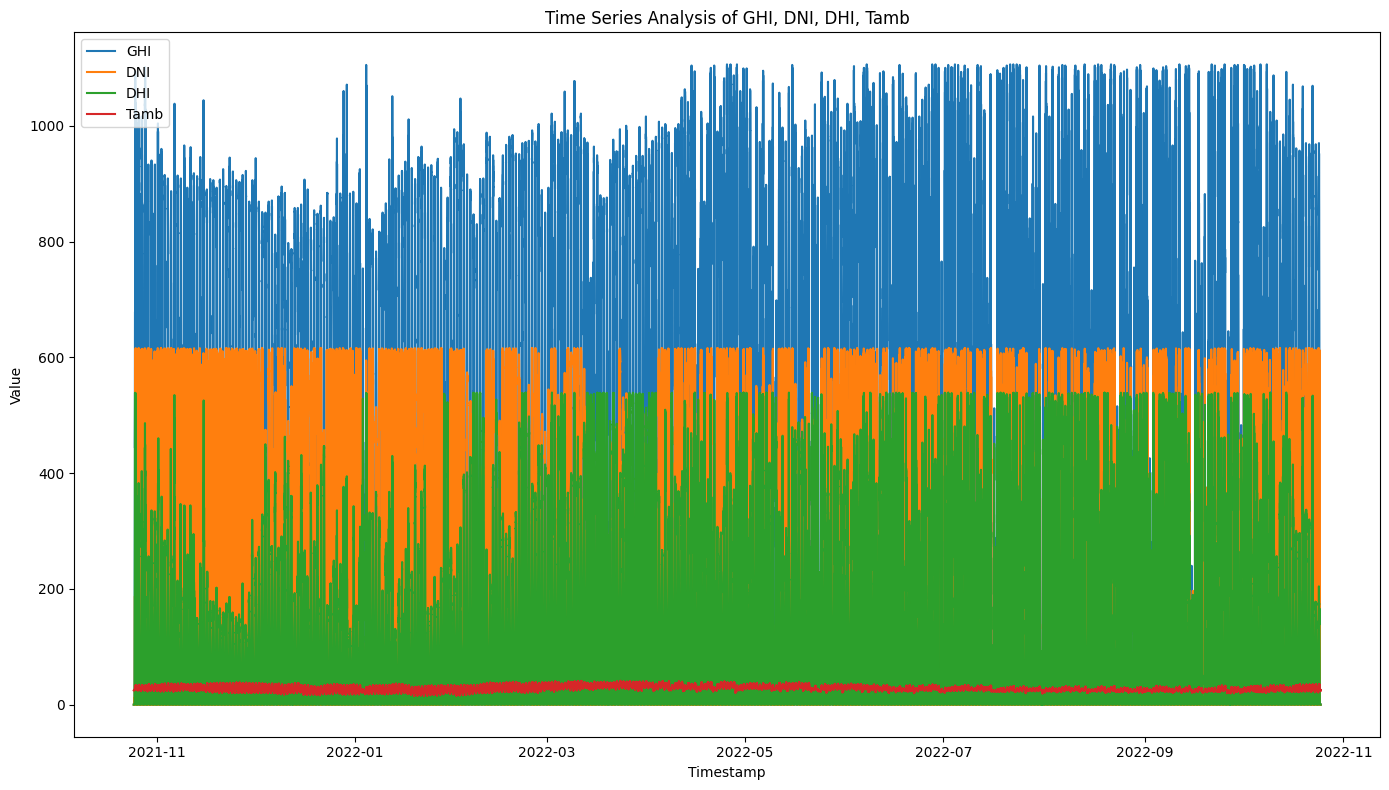

In [12]:
plt.figure(figsize=(14, 8))
plot_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

for col in plot_cols:
    plt.plot(cleaned_data['Timestamp'], cleaned_data[col], label=col, linewidth=1.5)

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Analysis of GHI, DNI, DHI, Tamb')
plt.legend()
plt.tight_layout()
plt.show()